In [3]:
import pandas as pd

ratings = pd.read_csv("C:/Users/Nidhi/Downloads/ml-100k/ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
ratings.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies = pd.read_csv(
    "C:/Users/Nidhi/Downloads/ml-100k/ml-100k/u.item",
    sep="|",
    encoding="latin-1",  # important because of special characters
    header=None,
    names=[
        "movie_id", "title", "release_date", "video_release_date", "IMDb_URL",
        "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
        "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
        "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
    ]
)
print(movies.head())


   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0

In [23]:
users = pd.read_csv(
    "C:/Users/Nidhi/Downloads/ml-100k/ml-100k/u.user",
    sep="|",
    header=None,
    names=["user_id", "age", "gender", "occupation", "zip_code"]
)
print(users.head())


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [5]:
df = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")
df.head()


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load ratings
ratings = pd.read_csv("C:/Users/Nidhi/Downloads/ml-100k/ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

# Load movies
movies = pd.read_csv("C:/Users/Nidhi/Downloads/ml-100k/ml-100k/u.item", sep="|", encoding="latin-1", header=None,
    names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL"] +
          [f"genre_{i}" for i in range(19)])

# Merge ratings with movie titles
df = pd.merge(ratings, movies[["movie_id", "title"]], on="movie_id")


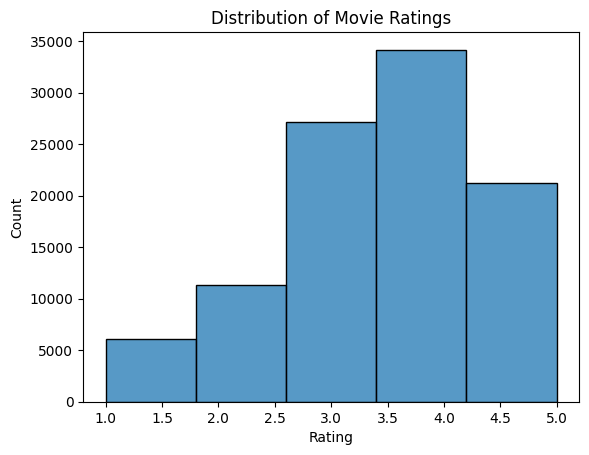

In [8]:
#rating distribution
sns.histplot(df["rating"], bins=5, kde=False)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


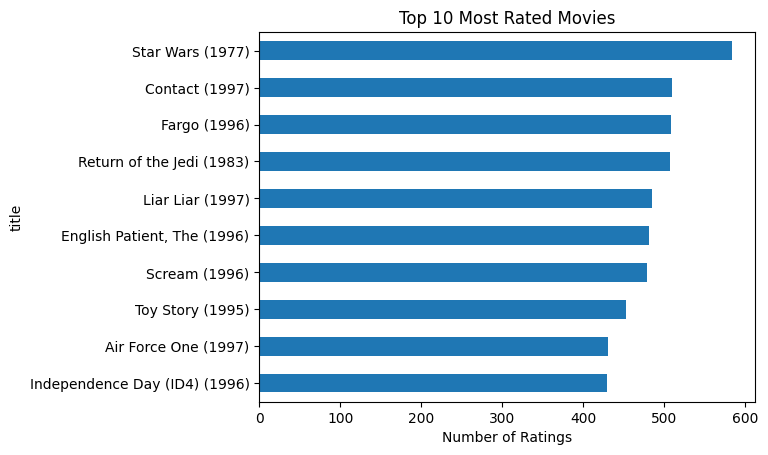

In [9]:
#most rated movies

top_movies = df["title"].value_counts().head(10)
top_movies.plot(kind='barh')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()
plt.show()


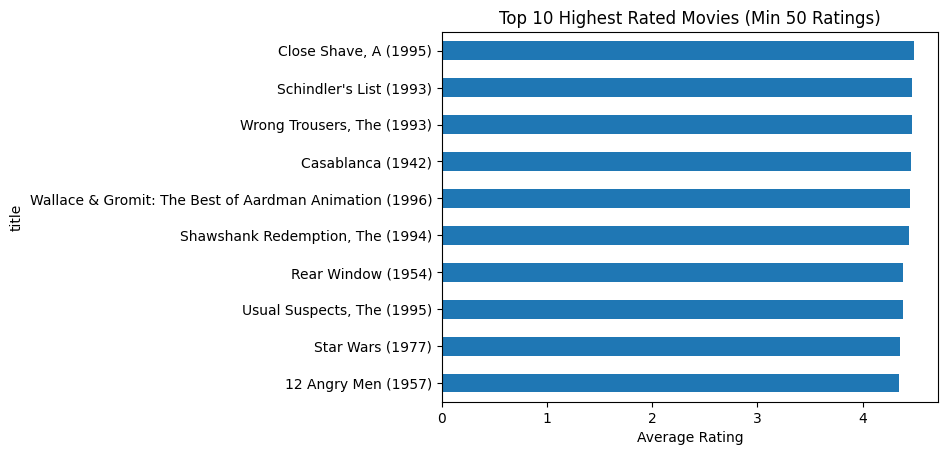

In [10]:
movie_stats = df.groupby("title").agg({"rating": ["mean", "count"]})
movie_stats.columns = ["avg_rating", "rating_count"]
popular_highly_rated = movie_stats[movie_stats["rating_count"] >= 50].sort_values("avg_rating", ascending=False).head(10)

popular_highly_rated["avg_rating"].plot(kind="barh")
plt.title("Top 10 Highest Rated Movies (Min 50 Ratings)")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.show()


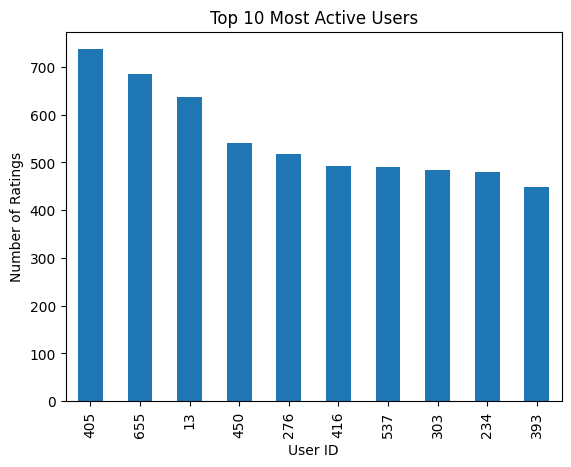

In [11]:
#most active users

df["user_id"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.show()


In [12]:
#reccommendation

#top 10 movies according to ratings
top_rated = popular_highly_rated.sort_values("avg_rating", ascending=False).head(10)
print(top_rated)


                                                    avg_rating  rating_count
title                                                                       
Close Shave, A (1995)                                 4.491071           112
Schindler's List (1993)                               4.466443           298
Wrong Trousers, The (1993)                            4.466102           118
Casablanca (1942)                                     4.456790           243
Wallace & Gromit: The Best of Aardman Animation...    4.447761            67
Shawshank Redemption, The (1994)                      4.445230           283
Rear Window (1954)                                    4.387560           209
Usual Suspects, The (1995)                            4.385768           267
Star Wars (1977)                                      4.358491           583
12 Angry Men (1957)                                   4.344000           125


In [19]:
#Create a Movie-User Matrix

movie_user_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
movie_user_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [21]:
target_movie = "Star Wars (1977)"
similar_movies = movie_user_matrix.corrwith(movie_user_matrix[target_movie])
similar_movies = pd.DataFrame(similar_movies, columns=["correlation"])
similar_movies = similar_movies.dropna()

In [48]:
similar_movies.dropna(inplace=True)
similar_movies = similar_movies.join(movie_stats["rating_count"])
recommended = similar_movies[similar_movies["rating_count"] > 50].sort_values("correlation", ascending=False).head(10)
print(recommended)


                                                    correlation  rating_count
title                                                                        
Star Wars (1977)                                       1.000000           583
Empire Strikes Back, The (1980)                        0.747981           367
Return of the Jedi (1983)                              0.672556           507
Raiders of the Lost Ark (1981)                         0.536117           420
Giant (1956)                                           0.488093            51
Life Less Ordinary, A (1997)                           0.411638            53
Austin Powers: International Man of Mystery (1997)     0.377433           130
Sting, The (1973)                                      0.367538           241
Indiana Jones and the Last Crusade (1989)              0.350107           331
Pinocchio (1940)                                       0.347868           101


In [24]:
import warnings

def recommend_movies(movie_name):
    if movie_name not in movie_user_matrix.columns:
        print("Movie not found in dataset.")
        return

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        movie_corr = movie_user_matrix.corrwith(movie_user_matrix[movie_name])

    corr_df = pd.DataFrame(movie_corr, columns=['correlation'])
    corr_df.dropna(inplace=True)

    # Join with rating count
    corr_df = corr_df.join(movie_stats["rating_count"])

    # Filter out low-rated ones
    recommendations = corr_df[corr_df["rating_count"] > 50].sort_values("correlation", ascending=False)

    print(f"\nMovies similar to '{movie_name}':\n")
    print(recommendations.head(10))


# Prompt the user
movie_input = input("Enter a movie you like: ")
recommend_movies(movie_input)


Enter a movie you like:  Star Wars (1977)



Movies similar to 'Star Wars (1977)':

                                                    correlation  rating_count
title                                                                        
Star Wars (1977)                                       1.000000           583
Empire Strikes Back, The (1980)                        0.747981           367
Return of the Jedi (1983)                              0.672556           507
Raiders of the Lost Ark (1981)                         0.536117           420
Giant (1956)                                           0.488093            51
Life Less Ordinary, A (1997)                           0.411638            53
Austin Powers: International Man of Mystery (1997)     0.377433           130
Sting, The (1973)                                      0.367538           241
Indiana Jones and the Last Crusade (1989)              0.350107           331
Pinocchio (1940)                                       0.347868           101
